## Getting started with images in OpenCV Python

## Reading, displaying and saving images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image

A note on the above:
1. OpenCV stores images as numpy arrays, hence numpy is needed.
2. There are various ways to display images. One can use the `imshow()` function in matplotlib (that's why it is included). `cv2` also has an imshow method for displaying images (However, it is recommended to use matplotlib's function inside the notebook)
3. `%matplotlib inline` tells Jupyter that we would like to render images inline (within the notebook).
4. We can also display an image directly in the browser using Ipython's `Image()` method.

In [2]:
# We readin images using `cv2.imread`
img_data = cv2.imread("images/cone.jpg", cv2.IMREAD_GRAYSCALE)
print(img_data)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [3]:
type(img_data)

numpy.ndarray

In [4]:
#image details
print(img_data.shape)
print(img_data.dtype)

(1200, 1200)
uint8


We see that the image is stored in a `numpy.ndarray` and can therefore be manipulated as any other numpy array. Also, it is important to note that numpy stores data in row-major order.
<br>
The shape is a tuple e.g. for a 2D array (row, column)

We can display the image in matplotlib:

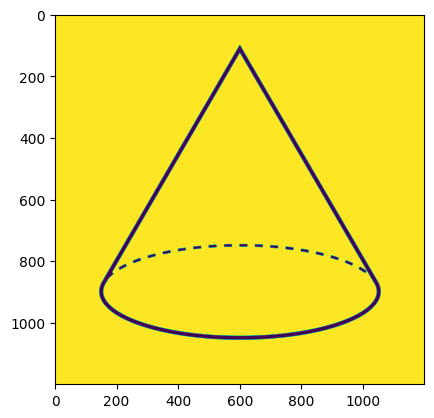

In [5]:
#we use the pyplot interface directly
#we can also bind the method to an object
#and access the `imshow` method using an Axes object
plt.figure()
_ = plt.imshow(img_data)

As we can see, the image is not grayscale, yet this is how we read it in (In `cv2.imread` we passed in the optional 2nd parameter and specified `cv2.IMREAD_GRAYSCALE`).
<br>
This is because matplotlib's `imshow` function has optional parameters one of which is known as `cmap` which specifies the colormap of the input image.
Let's go ahead and specify this as `cmap='gray'`. We will also define the colormap range of values: `vmin=0` and `vmax=255`.

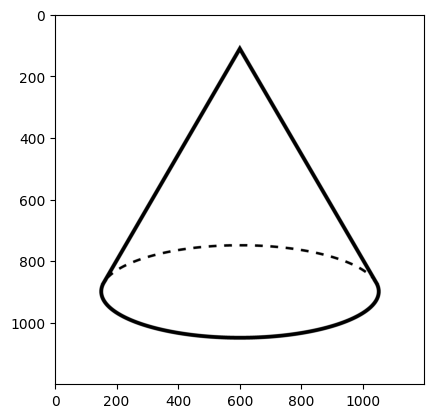

In [6]:
_ = plt.imshow(img_data, cmap='gray', vmin=0, vmax=255)

Now we see we have the gray image we wanted. To remove the need of repetition, we can set a default parameter for matplotlib to always show images as gray, like so:
<br>
`matplotlib.rc('image', cmap="gray")`
<br>
The docs for the `rc` method can be found [here](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc).

Let's try a few things on the image:
* **Inverting colors**

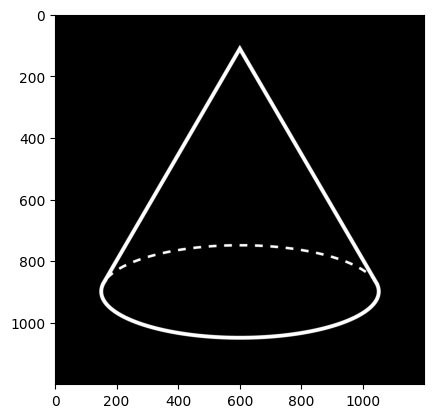

In [7]:
#simplest non-standard way
img_data2 = (255 - img_data)
_ = plt.imshow(img_data2, cmap='grey')

* **Resampling**

Here we resample `img_data` by taking the mean of every 3 x 3 block of pixels `img_data[:3, :3]`. We then store the values in a linear array of shape `(160000, )` which we then reshape to `(400, 400)`. We will then output the resultant image to see how it looks like.

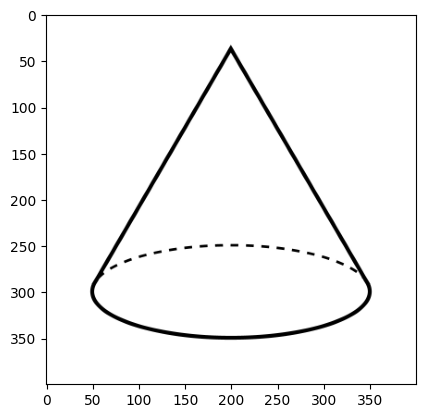

In [8]:
#We want to build an image of img_data, by taking the mean value of every 3 x 3 block of pixels
#We reshape the resultant image into a 400 x 400 image
arrxn = np.empty(160000)
shape = 0
for y in range(0, 1200, 3):
    for x in range(0, 1200, 3):
        arrxn[shape] = np.floor(np.mean(img_data[y:y+3, x:x+3]))
        shape+=1

arrxt = arrxn.reshape(400, 400) #reshaping
_ = plt.imshow(arrxt, cmap='grey')

Here we see the same image as `img_data`. Although they look exact, in the above image, every pixel is the mean of a `3 x 3` region of pixels in `img_data`. We can see this based on the scale provided by matplotlib which runs to 400, while in the original, the scale runs to 1200.

## Saving an Image

We can do this simply by using `cv2.imwrite` method. Let us save the cone we created above.

In [9]:
#the imwrite method returns a boolean value for success/failure, we ignore it
_ = cv2.imwrite("cone_400 x 400.png", arrxt)

## Color Images

We are going to load a color image and see its layout in a numpy array.

In [10]:
#without passing the 2nd parameter, imread loads the image as is
bluebird = cv2.imread("images/bluebird.jpg")

Now we examine the image.

In [11]:
print(bluebird)

[[[ 35  64  73]
  [ 34  63  72]
  [ 32  63  72]
  ...
  [  7  59 119]
  [ 13  67 127]
  [ 13  67 127]]

 [[ 35  64  73]
  [ 34  63  72]
  [ 32  63  72]
  ...
  [  6  58 118]
  [ 12  66 126]
  [ 12  66 126]]

 [[ 34  63  72]
  [ 34  63  72]
  [ 31  62  71]
  ...
  [  5  57 117]
  [ 10  64 124]
  [ 10  64 124]]

 ...

 [[ 29 128 186]
  [ 22 122 180]
  [ 15 122 179]
  ...
  [ 13  65 135]
  [  4  56 126]
  [ 20  72 142]]

 [[ 38 131 186]
  [ 28 126 180]
  [ 22 125 180]
  ...
  [ 13  65 135]
  [ 18  69 139]
  [ 35  86 156]]

 [[ 41 134 189]
  [ 31 129 183]
  [ 25 128 183]
  ...
  [ 13  65 135]
  [ 22  73 143]
  [ 39  90 160]]]


In [12]:
bluebird.shape

(355, 474, 3)

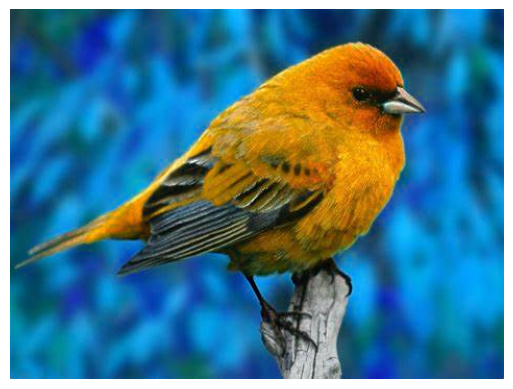

In [13]:
plt.imshow(bluebird)
_ = plt.axis("off")

We show the same image using Ipython's `Image()` method.

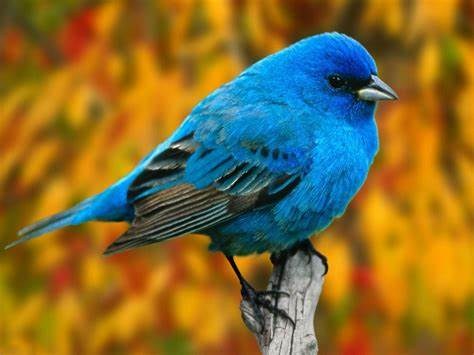

In [14]:
Image(filename="images/bluebird.jpg")

The image seen here, is the original image. It differs significantly from the one we produced in the previous Matplotlib example.
<br>
<br>
Why is that?
<br>
This is because, OpenCV stores images in the numpy array as BGR not RGB. To get a similar image as above, we convert to RGB using `cv2.cvtColor()`.

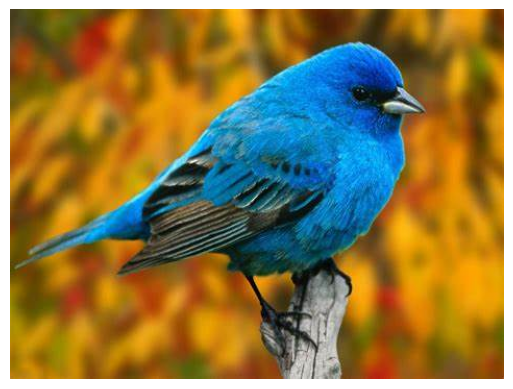

In [15]:
bluebird = cv2.cvtColor(bluebird, cv2.COLOR_BGR2RGB)
plt.imshow(bluebird)
_ = plt.axis("off")

We see that the image is similar to the one we created above.

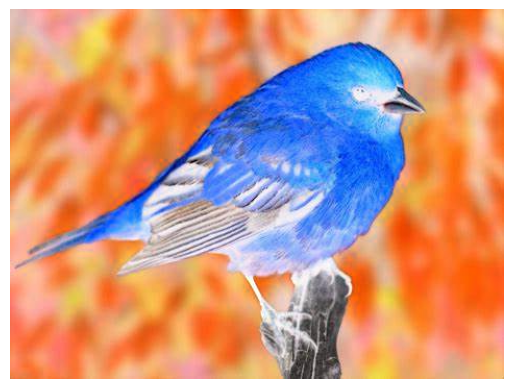

In [16]:
#We will try and invert the colors
newshape = np.zeros_like(bluebird)
where = 0
for row in range(bluebird.shape[0]):
    for col in range(bluebird.shape[1]):
        pixel = bluebird[row, col]
        pixel[0], pixel[2] = (255 - pixel[2]), (255 - pixel[0])
        pixel[1] = 255 - pixel[1]
        newshape[row, col] = pixel

plt.imshow(newshape)
_ = plt.axis("off")

## A number of 'kernel restarts' may be necessary to give you the right outputs.